# 1. Introduction

Created By: **Hussein Muhammad Saefullah** 

⚙️ [**LinkedIn**](https://linkedin.com/in/husseinms/) <p>
💻 [**Github**](https://github.com/36senm)


# 2. Task and Problem 

### **Objektif**

**The Prediction Model** <p>
🎯 The purpose of this project is to find out the estimated quantity of products sold so that the inventory team can make daily inventory stock that is sufficient. <p>
🎯 The predictions made must be daily.

**Clustering** <p>
🎯The purpose of this project is to create customer segment. <p>
🎯This customer segment will later be used by marketing team to provide personalized promotion and sales treatment.

### **Problem**

📋 From the inventory team, you are asked to be able to help predict the number of sales (quantity) of the total Kalbe products. <p>
📋 From the marketing team you are asked to create cluster/segment customers based on several criteria.

**Dict**

Berisi Legend dari dataset

1. Customer
- CustomerID : Customer Unique Number
- Age : Customer's Age
- Gender : 0 Female, 1 Male
- Marital Status : Married, Single (Not married / Has been married)
- Income : Income per month in million rupiah

2. Store
- StoreID : Unique Store Code
- StoreName : Store Name
- GroupStore : Group name
- Type : Modern Trade, General Trade
- Latitude : Latitude Code
- Longitude : Longitude Code

3. Product
- ProductID : Product Unique Code
- Product Name : Product Name
- Price : Price in rupiah

4. Transaction
- TransactionID : Unique Transaction Code
- Date : Date of transaction
- Qty : Number of items purchased
- Total Amount : Price x Qty

Translated with www.DeepL.com/Translator (free version)

# 3. Import Libraries

**Berisi semua library yang digunakan dalam project.**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score,silhouette_samples
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import matplotlib.cm as cm

In [2]:
import os

os.environ["OMP_NUM_THREADS"] = "2"


# 4. Data Loading

**Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.**

In [3]:
pd.options.display.max_columns = None 

In [4]:
df_transaction = pd.read_table("../dataset/Transaction.csv", delimiter=';')
df_store = pd.read_table("../dataset/Store.csv", delimiter=';')
df_customer = pd.read_table("../dataset/Customer.csv", delimiter=';')
df_product = pd.read_table("../dataset/Product.csv", delimiter=';')

In [5]:
df_transaction

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4
...,...,...,...,...,...,...,...,...
5015,TR54423,243,31/12/2022,P10,15000,5,75000,3
5016,TR5604,271,31/12/2022,P2,3200,4,12800,9
5017,TR81224,52,31/12/2022,P7,9400,6,56400,9
5018,TR85016,18,31/12/2022,P8,16000,3,48000,13


In [6]:
df_store

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"
5,6,Lingga,Lingga,Modern Trade,"-5,135399","119,42379"
6,7,Buana Indah,Buana,General Trade,"3,316694","114,590111"
7,8,Sinar Harapan,Harapan Baru,General Trade,"5,54829","95,323753"
8,9,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
9,10,Harapan Baru,Harapan Baru,General Trade,"3,597031","98,678513"


In [7]:
df_customer

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"
...,...,...,...,...,...
442,443,33,1,NaN,"9,28"
443,444,53,0,Married,"15,31"
444,445,51,0,Married,"14,48"
445,446,57,0,Married,"7,81"


In [8]:
df_product

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200
5,P6,Cashew,18000
6,P7,Coffee Candy,9400
7,P8,Oat,16000
8,P9,Yoghurt,10000
9,P10,Cheese Stick,15000


In [9]:
# list df to merge
dataframes = [df_transaction, df_store, df_customer, df_product]

# main_transaction to merge
merged_df = dataframes[0]

# itterate through every df
for i in dataframes[1:]:
    common_key = [j for j in i.columns if j in merged_df.columns][0]
    merged_df = merged_df.merge(i, on=common_key, how='outer')



In [10]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/08/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/04/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19/01/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28/04/2022' in DD/MM/YYYY format. Provide format or specif

In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   5020 non-null   object        
 1   CustomerID      5020 non-null   int64         
 2   Date            5020 non-null   datetime64[ns]
 3   ProductID       5020 non-null   object        
 4   Price_x         5020 non-null   int64         
 5   Qty             5020 non-null   int64         
 6   TotalAmount     5020 non-null   int64         
 7   StoreID         5020 non-null   int64         
 8   StoreName       5020 non-null   object        
 9   GroupStore      5020 non-null   object        
 10  Type            5020 non-null   object        
 11  Latitude        5020 non-null   object        
 12  Longitude       5020 non-null   object        
 13  Age             5020 non-null   int64         
 14  Gender          5020 non-null   int64         
 15  Mari

In [12]:
merged_df = merged_df.sort_values('Date')

# 5. EDA 

**Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.**

In [13]:
merged_df.shape

(5020, 19)

In [14]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 3173
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   5020 non-null   object        
 1   CustomerID      5020 non-null   int64         
 2   Date            5020 non-null   datetime64[ns]
 3   ProductID       5020 non-null   object        
 4   Price_x         5020 non-null   int64         
 5   Qty             5020 non-null   int64         
 6   TotalAmount     5020 non-null   int64         
 7   StoreID         5020 non-null   int64         
 8   StoreName       5020 non-null   object        
 9   GroupStore      5020 non-null   object        
 10  Type            5020 non-null   object        
 11  Latitude        5020 non-null   object        
 12  Longitude       5020 non-null   object        
 13  Age             5020 non-null   int64         
 14  Gender          5020 non-null   int64         
 15  Mari

Dataset yang diolah mempunyai bentuk ***5020 Baris dan 19 Kolom*** <br> 
Terdapat *missing value* pada dataset. handling *missing value* diperlukan pada tahap preprocessing

In [15]:
merged_df.isnull().sum()

TransactionID      0
CustomerID         0
Date               0
ProductID          0
Price_x            0
Qty                0
TotalAmount        0
StoreID            0
StoreName          0
GroupStore         0
Type               0
Latitude           0
Longitude          0
Age                0
Gender             0
Marital Status    44
Income             0
Product Name       0
Price_y            0
dtype: int64

Ditemukan sebanyak **44** Missing value pada Kolom ***Marital Status*** 

Graph

In [16]:
merged_df.columns

Index(['TransactionID', 'CustomerID', 'Date', 'ProductID', 'Price_x', 'Qty',
       'TotalAmount', 'StoreID', 'StoreName', 'GroupStore', 'Type', 'Latitude',
       'Longitude', 'Age', 'Gender', 'Marital Status', 'Income',
       'Product Name', 'Price_y'],
      dtype='object')

In [17]:
col_int = merged_df[['CustomerID','Price_x','Qty','TotalAmount','Gender','Age']]

In [18]:
col_int

,CustomerID,Price_x,Qty,TotalAmount,Gender,Age
0,328,7500,4,30000,0,36
2319,165,10000,7,70000,1,44
971,270,9400,2,18800,1,49
2309,222,10000,6,60000,0,45
3204,51,16000,2,32000,0,36
...,...,...,...,...,...,...
979,212,9400,2,18800,0,36
4169,243,15000,5,75000,0,38
3209,18,16000,3,48000,0,47
366,203,7500,1,7500,0,53


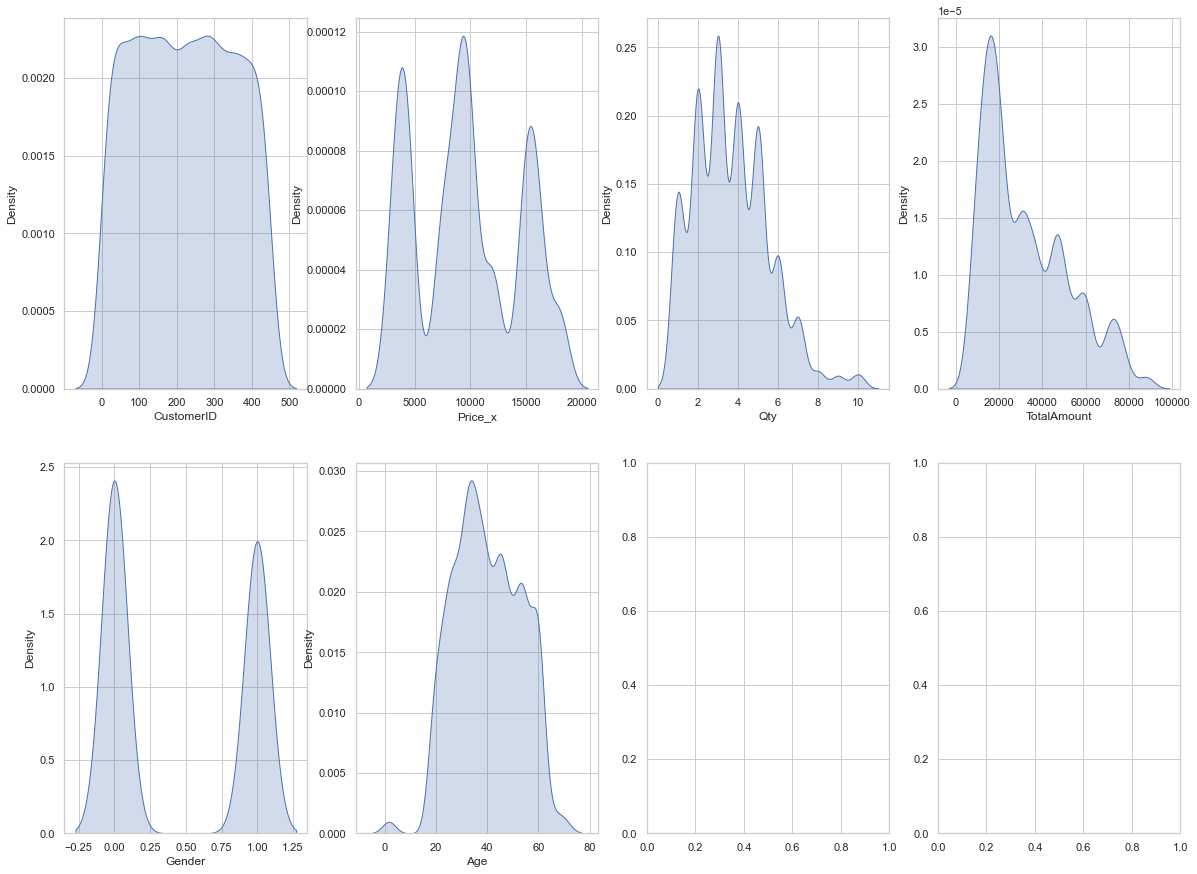

In [19]:
sns.set_theme(style="whitegrid")
figeda, axeseda = plt.subplots(nrows=2, ncols=4, figsize=(20,15))
i = 0
j = 0

for col in col_int.columns:
    if i < 3 and j < 4:  
        sns.kdeplot(data=col_int, x=col, fill=True, ax=axeseda[i][j])
        j += 1
        if j >= 4:
            j = 0
            i += 1
    else:
        break  


Qty and TotalAmount Looks Skewed to right

# 6. Data Preprocessing 

**Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test-inference, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.**

### Handling Missing Value

Since the missing value is only present in one row, which is in the 'Marital Status' column, it might affect certain criteria if we input a value. Therefore, we have decided to remove it to maintain the original integrity of the data.

In [20]:
merged_df.dropna(subset=['Marital Status'], inplace=True)

In [21]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4976 entries, 0 to 3173
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   4976 non-null   object        
 1   CustomerID      4976 non-null   int64         
 2   Date            4976 non-null   datetime64[ns]
 3   ProductID       4976 non-null   object        
 4   Price_x         4976 non-null   int64         
 5   Qty             4976 non-null   int64         
 6   TotalAmount     4976 non-null   int64         
 7   StoreID         4976 non-null   int64         
 8   StoreName       4976 non-null   object        
 9   GroupStore      4976 non-null   object        
 10  Type            4976 non-null   object        
 11  Latitude        4976 non-null   object        
 12  Longitude       4976 non-null   object        
 13  Age             4976 non-null   int64         
 14  Gender          4976 non-null   int64         
 15  Mari

### Handling Duplicate Value

As we know, there are several columns that contain Unique Value. This value is supposed to be unique and cannot be duplicated. We will check these values to identify any duplicates.

In [22]:
duplicate = merged_df.drop_duplicates(subset=['TransactionID'], keep='last').reset_index(drop=True)

In [23]:
duplicate

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,StoreName,GroupStore,Type,Latitude,Longitude,Age,Gender,Marital Status,Income,Product Name,Price_y
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",36,0,Married,"10,53",Crackers,7500
1,TR16356,165,2022-01-01,P9,10000,7,70000,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666",44,1,Married,"14,58",Yoghurt,10000
2,TR7596,270,2022-01-01,P7,9400,2,18800,14,Priangan,Priangan,Modern Trade,"-5,45","105,26667",49,1,Married,"8,81",Coffee Candy,9400
3,TR73041,222,2022-01-01,P9,10000,6,60000,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664",45,0,Married,"15,03",Yoghurt,10000
4,TR99839,123,2022-01-01,P2,3200,6,19200,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666",34,0,Married,"4,36",Ginger Candy,3200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4861,TR31574,212,2022-12-31,P7,9400,2,18800,13,Buana,Buana,General Trade,"-1,26916","116,825264",36,0,Married,"7,96",Coffee Candy,9400
4862,TR54423,243,2022-12-31,P10,15000,5,75000,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529",38,0,Married,"3,34",Cheese Stick,15000
4863,TR85016,18,2022-12-31,P8,16000,3,48000,13,Buana,Buana,General Trade,"-1,26916","116,825264",47,0,Married,"13,6",Oat,16000
4864,TR12821,203,2022-12-31,P3,7500,1,7500,10,Harapan Baru,Harapan Baru,General Trade,"3,597031","98,678513",53,0,Married,"17,2",Crackers,7500


#### Handling small detail

change income, latitude and longitude to int since the data as basicaly an int

In [24]:
merged_df[['Latitude', 'Longitude', 'Income']] = merged_df[['Latitude', 'Longitude', 'Income']].apply(lambda x: x.str.replace(',', '.', regex=True)).astype(float)

---

In [25]:
col_num = pd.DataFrame()
col_obj = pd.DataFrame()

for i in merged_df.columns:
    col = merged_df[i]

    if col.apply(lambda x: isinstance(x, int)).all():
        col_num[i] = col
    elif col.apply(lambda x: isinstance(x, float)).all():
        col_num[i] = col
    else: 
        col_obj[i] = col

---

In [26]:
merged_df.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,StoreName,GroupStore,Type,Latitude,Longitude,Age,Gender,Marital Status,Income,Product Name,Price_y
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,36,0,Married,10.53,Crackers,7500
2319,TR16356,165,2022-01-01,P9,10000,7,70000,1,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666,44,1,Married,14.58,Yoghurt,10000
971,TR7596,270,2022-01-01,P7,9400,2,18800,14,Priangan,Priangan,Modern Trade,-5.450000,105.266670,49,1,Married,8.81,Coffee Candy,9400
2309,TR73041,222,2022-01-01,P9,10000,6,60000,4,Gita Ginara,Gita,General Trade,-6.966667,110.416664,45,0,Married,15.03,Yoghurt,10000
3204,TR54287,51,2022-01-01,P8,16000,2,32000,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238,36,0,Married,7.95,Oat,16000


In [27]:
merged_df.groupby(by=['Date']).agg({'Qty' : 'sum'})

,Qty
Date,
2022-01-01,49
2022-01-02,50
2022-01-03,76
2022-01-04,98
2022-01-05,67
...,...
2022-12-27,70
2022-12-28,68
2022-12-29,42


# 7. Model Definition

**Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.**

## Time Series

In [28]:
az = merged_df.groupby(by=['Date']).agg({'Qty': 'sum'}).reset_index()

fig = px.line(az, x='Date', y='Qty')
fig.update_layout(xaxis=dict(showgrid=False),
                  yaxis=dict(showgrid=False))
fig.update_layout( plot_bgcolor='white' ) 
fig.show()


In [29]:
ax = merged_df.groupby(by=['Date']).agg({'Qty': 'sum'})

rolmean = ax.rolling(window=12).mean() 
rolstd = ax.rolling(window=12).std()

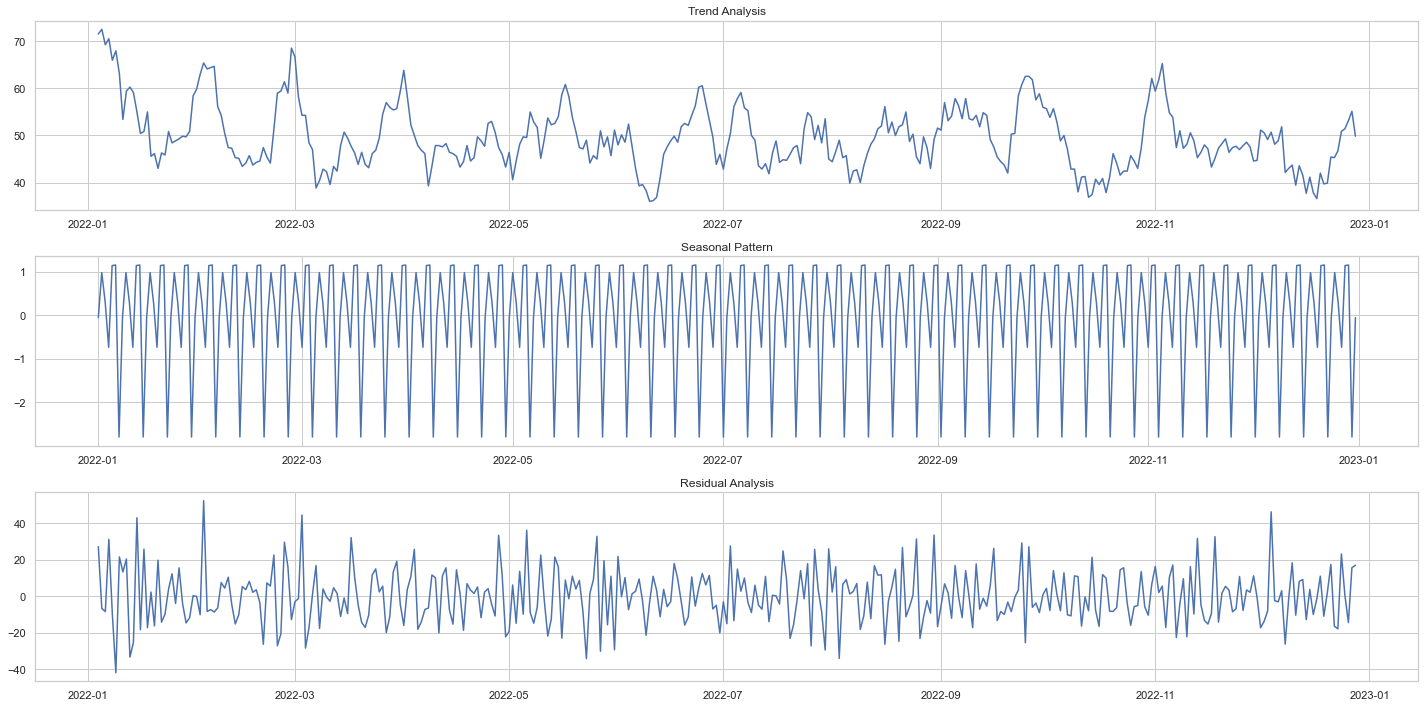

In [30]:
decomp = seasonal_decompose(ax)

plt.figure(figsize=(20, 10))

plt.subplot(311)
plt.plot(decomp.trend)
plt.title('Trend Analysis')
plt.tight_layout()

plt.subplot(312)
plt.plot(decomp.seasonal)
plt.title('Seasonal Pattern')

plt.subplot(313)
plt.plot(decomp.resid)
plt.title('Residual Analysis')
plt.tight_layout()

### Stationary Checking

In [31]:
#dickey-fuller testing

df_testing = adfuller(ax)
print('Dickey-Fuller Test Results:')
print(f'Test Statistic: {df_testing[0]}')
print(f'p-value: {df_testing[1]}')
print(f'Number of Lags Used: {df_testing[2]}')
print(f'Number of Observations Used: {df_testing[3]}')
print('Critical Values:')
for key, value in df_testing[4].items():
    print(f'\t\t\t{key}: {value}')

Dickey-Fuller Test Results:
Test Statistic: -19.091513872408125
p-value: 0.0
Number of Lags Used: 0
Number of Observations Used: 364
Critical Values:
			1%: -3.4484434475193777
			5%: -2.869513170510808
			10%: -2.571017574266393


Based on this result we get that : 

1. The test statistic is highly negative.
2. The p-value is extremely low (close to zero).
3. The test statistic is much lower than the critical values at all significance levels.

indicating that the time series data is likely **stationary**.

----

In [32]:
# split the train-test
X = ax.iloc[:-31]
y = ax.iloc[-31:]
print("Training set shape:", X.shape)
print("Testing set shape:", y.shape)

Training set shape: (334, 1)
Testing set shape: (31, 1)


In [33]:
auto_arima_model = auto_arima(X['Qty'], seasonal=False, stepwise=False, suppress_warnings=True, trace = True)
print(auto_arima_model.summary())

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3598.863, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3377.730, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=3258.312, Time=0.09 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=3199.245, Time=0.15 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=3130.690, Time=0.26 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=3099.336, Time=0.40 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3047.541, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2839.917, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2841.887, Time=0.12 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=2843.370, Time=0.21 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2954.133, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2841.885, Time=0.13 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2842.634, Time=0.14 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=2844.627, Time=0.19 sec
 ARIMA(3,0,0)(0

After doing analysis to determine the best ARIMA model, we found that the optimal model is **ARIMA(1,0,1)(0,0,0)[0] AIC 2495**.

In [34]:
best_order = auto_arima_model.order
model = ARIMA(X, order=best_order)
arima_model = model.fit()
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                    Qty   No. Observations:                  334
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1412.146
Date:                Sun, 29 Oct 2023   AIC                           2832.293
Time:                        21:49:30   BIC                           2847.537
Sample:                    01-01-2022   HQIC                          2838.371
                         - 11-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.0640      0.971     51.540      0.000      48.160      51.968
ar.L1         -0.9849      0.039    -25.435      0.000      -1.061      -0.909
ma.L1          0.9747      0.050     19.474      0.0

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



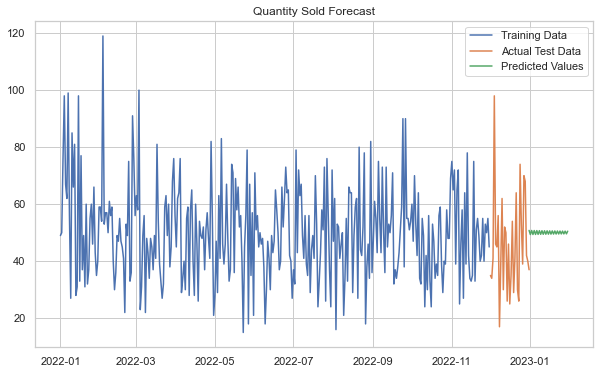

In [35]:
# Make a new dataframe for forecast
forecast_period = y.shape[0] 
forecast = arima_model.forecast(steps=forecast_period)
forecast_index = pd.date_range(start=y.index[-1], periods=forecast_period)
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Qty'])

# Plot and Visualize Predicted Values for Quantity Sold
plt.figure(figsize=(10, 6))
plt.plot(X.index, X['Qty'], label='Training Data')
plt.plot(y.index, y['Qty'], label='Actual Test Data')
plt.plot(forecast_df.index, forecast, label='Predicted Values')
plt.title('Quantity Sold Forecast')
plt.legend()
plt.show()

In [36]:
arima_model = ARIMA(y['Qty'], order=(1, 0, 1))
arima_model_fit = arima_model.fit()

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [37]:
ar_s = len(y.index)
pred = arima_model_fit.forecast(steps=ar_s)

In [38]:
rmse_val = mean_squared_error(y['Qty'], pred, squared=False)
mae_val = mean_absolute_error(y['Qty'], pred)
r2_score_val = r2_score(y['Qty'], pred)
mse_val = mean_squared_error(y['Qty'], pred)

In [39]:
print('Root Mean Squared Error (RMSE):', round(rmse_val, 3))
print('Mean Absolute Error (MAE):', round(mae_val, 3))
print("R2 Score:", round(r2_score_val, 3))
print("Mean Squared Error (MSE):", round(mse_val, 3))

Root Mean Squared Error (RMSE): 16.867
Mean Absolute Error (MAE): 13.016
R2 Score: 0.012
Mean Squared Error (MSE): 284.494


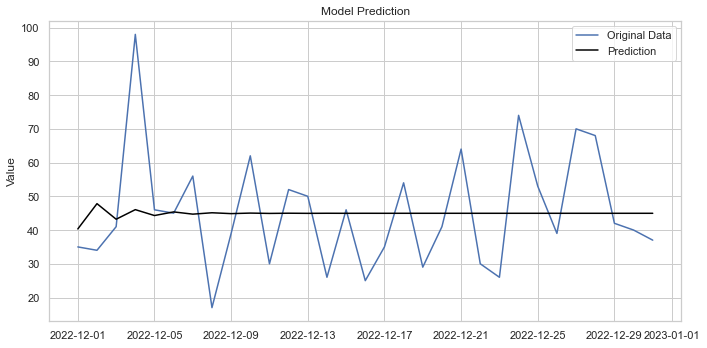

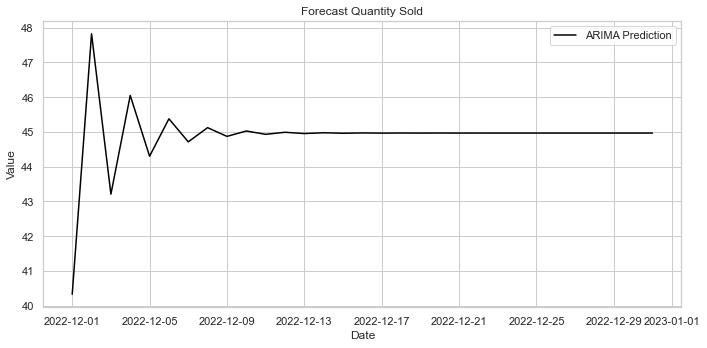

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(y['Qty'].index, y['Qty'], label='Original Data')
plt.plot(y['Qty'].index, pred, color='black', label='Prediction')
plt.ylabel('Value')
plt.title('Model Prediction')
plt.legend()
plt.tight_layout()

plt.figure(figsize=(10, 5))
plt.plot(y['Qty'].index, pred, color='black', label='ARIMA Prediction')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Forecast Quantity Sold')
plt.legend()
plt.tight_layout()

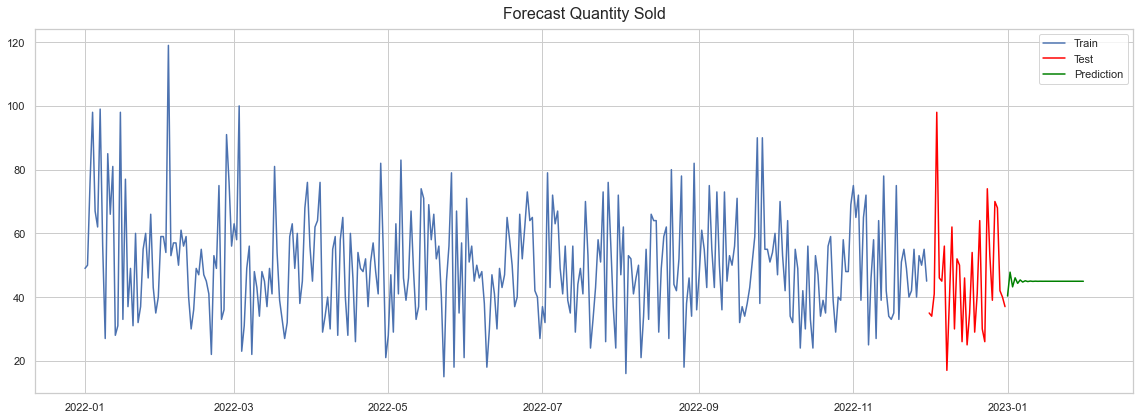

In [41]:
plt.figure(figsize=(16, 6))
plt.plot(X['Qty'], label='Train')
plt.plot(y['Qty'], color='red', label='Test')
plt.plot(pred, color='green', label='Prediction')
plt.title('Forecast Quantity Sold', fontsize=16, pad=10)
plt.legend()
plt.tight_layout()

In [42]:
mean_qty_sold = round(pred.mean())
print(f"Mean Quantity Sold Per day: {mean_qty_sold}")

Mean Quantity Sold Per day: 45


## Clustering

In [43]:
merged_df = merged_df.reset_index(drop=True)

In [44]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4976 entries, 0 to 4975
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   4976 non-null   object        
 1   CustomerID      4976 non-null   int64         
 2   Date            4976 non-null   datetime64[ns]
 3   ProductID       4976 non-null   object        
 4   Price_x         4976 non-null   int64         
 5   Qty             4976 non-null   int64         
 6   TotalAmount     4976 non-null   int64         
 7   StoreID         4976 non-null   int64         
 8   StoreName       4976 non-null   object        
 9   GroupStore      4976 non-null   object        
 10  Type            4976 non-null   object        
 11  Latitude        4976 non-null   float64       
 12  Longitude       4976 non-null   float64       
 13  Age             4976 non-null   int64         
 14  Gender          4976 non-null   int64         
 15  Mari

In [45]:
cluster_df = merged_df.groupby('CustomerID').agg({
    'TransactionID': 'size', 
    'Qty': 'sum',            
    'TotalAmount': 'sum'      
}).reset_index()

In [46]:
# drop the customerID column since it match with is index
cluster_df = cluster_df.drop(columns=['CustomerID'])

In [47]:
cluster_df

,TransactionID,Qty,TotalAmount
0,17,60,623300
1,13,57,392300
2,15,56,446200
3,10,46,302500
4,7,27,268600
...,...,...,...
439,13,37,269400
440,18,62,577700
441,18,68,587200
442,11,42,423300


Checking an outliers

In [48]:
def diagnostic_plots(data_train, column):
    #define the figure
    plt.figure(figsize=(15,5))

    #plot the histogram
    plt.subplot(1,2,1)
    sns.histplot(data_train[column], bins=18)
    plt.title('Histogram')

    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y=data_train[column])
    plt.title('Boxplot')

    #show the plot
    plt.show()

def distribution_features(data_train, column):
    for column in column:
        print(column)
        print('Distribution:', data_train[column].skew())
        print('Kurtosis:', data_train[column].kurt())
        print('\n')

        if data_train[column].skew() < 0.5 and data_train[column].skew() > -0.5:
            print('Kemungkinan data normal')
        elif data_train[column].skew() < -1 or data_train[column].skew() > 1:
            print('Highly Skewed')
        elif data_train[column].skew() >= -0.5 or data_train[column].skew() <= 0.5:
            print('moderately skewed')
        else:
            print('Skew is zero')
            
        diagnostic_plots(data_train, column) 


TransactionID
Distribution: 0.19786024341499148
Kurtosis: -0.28661778182961184


Kemungkinan data normal


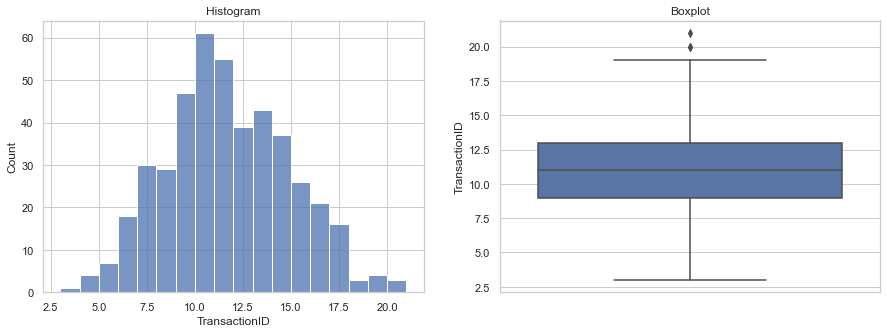

Qty
Distribution: 0.2764201171741057
Kurtosis: -0.2308154270549343


Kemungkinan data normal


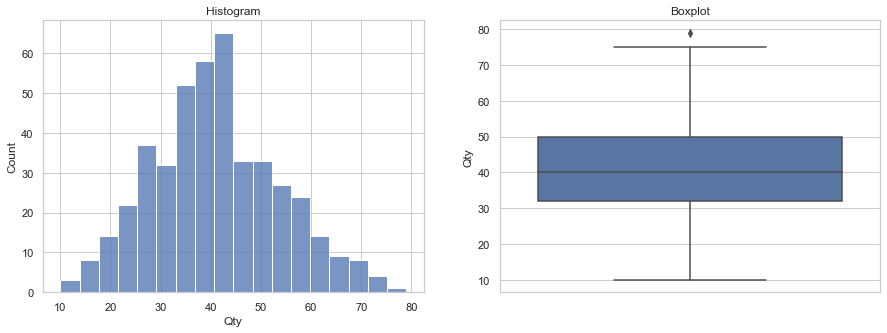

TotalAmount
Distribution: 0.4892930203240972
Kurtosis: 0.1955830531472058


Kemungkinan data normal


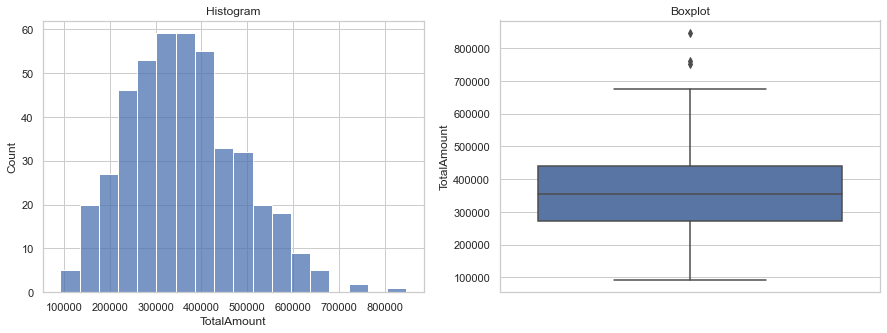

In [49]:
distribution_features(cluster_df, cluster_df.columns)

Given that the data is already normally distributed, it seems Standardization seems a good option for scaling 

In [50]:
scaling = StandardScaler()
cluster_scaled = scaling.fit_transform(cluster_df)

In [51]:
clustered_scaled = pd.DataFrame(cluster_scaled, columns=cluster_df.columns)

In [52]:
clustered_scaled

,TransactionID,Qty,TotalAmount
0,1.788282,1.508934,2.102424
1,0.553450,1.272891,0.246343
2,1.170866,1.194211,0.679428
3,-0.372675,0.407403,-0.475199
4,-1.298799,-1.087531,-0.747585
...,...,...,...
439,0.553450,-0.300723,-0.741157
440,2.096990,1.666295,1.736029
441,2.096990,2.138380,1.812361
442,-0.063967,0.092680,0.495427


In [53]:
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")

Text(0, 0.5, 'Inertia')

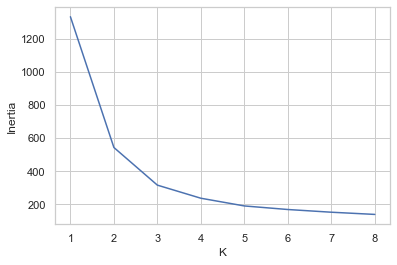

In [54]:
# check elbow method
K=[1,2,3,4,5,6,7,8]
inertia=[KMeans(n_clusters=i, n_init=10, random_state=63).fit(cluster_scaled).inertia_ for i in K]
plt.plot(K,inertia)
plt.xlabel('K')
plt.ylabel('Inertia')

Text(0, 0.5, 'Silhouette Score')

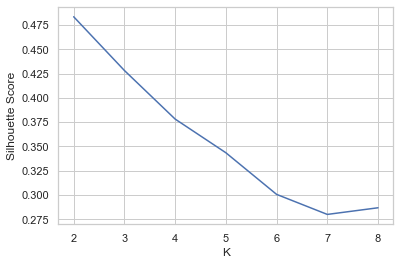

In [55]:
#cek silhouette score

K=[2,3,4,5,6,7,8]
s_score=[silhouette_score(cluster_scaled, KMeans(n_clusters=i, n_init=10, random_state=63).fit(cluster_scaled).labels_) for i in K]
plt.plot(K,s_score)
plt.xlabel('K')
plt.ylabel('Silhouette Score')

In [56]:
def plot_silhouette(range_n_clusters,X):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters,n_init=10, random_state=63)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.4835182946272509
For n_clusters = 3 The average silhouette_score is : 0.4281636407220776
For n_clusters = 4 The average silhouette_score is : 0.3781275736270201
For n_clusters = 5 The average silhouette_score is : 0.3434371441372868
For n_clusters = 6 The average silhouette_score is : 0.3005529089363074
For n_clusters = 7 The average silhouette_score is : 0.27990365041484533
For n_clusters = 8 The average silhouette_score is : 0.28674847140946946


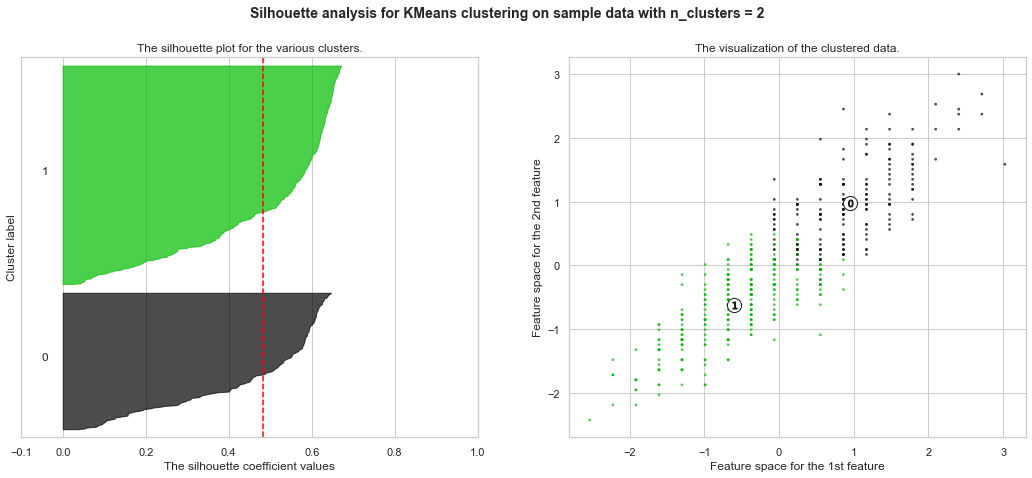

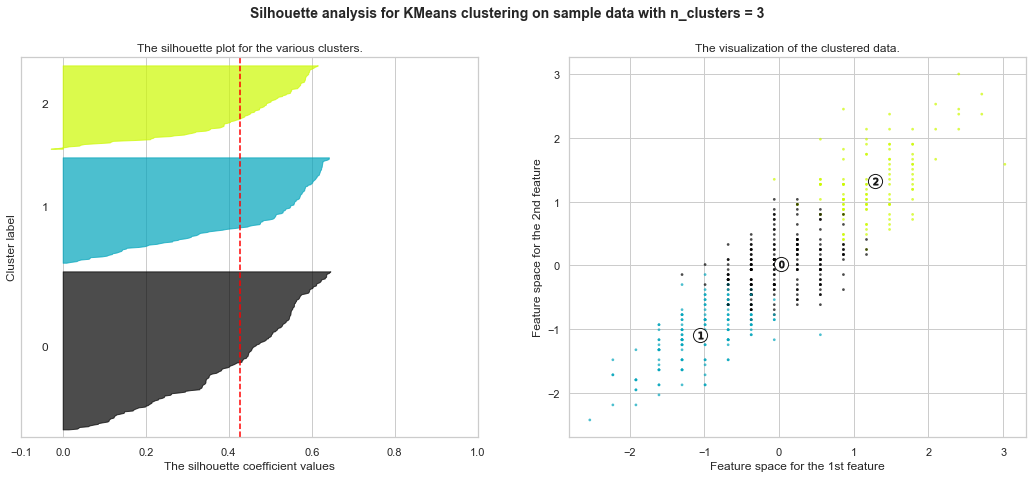

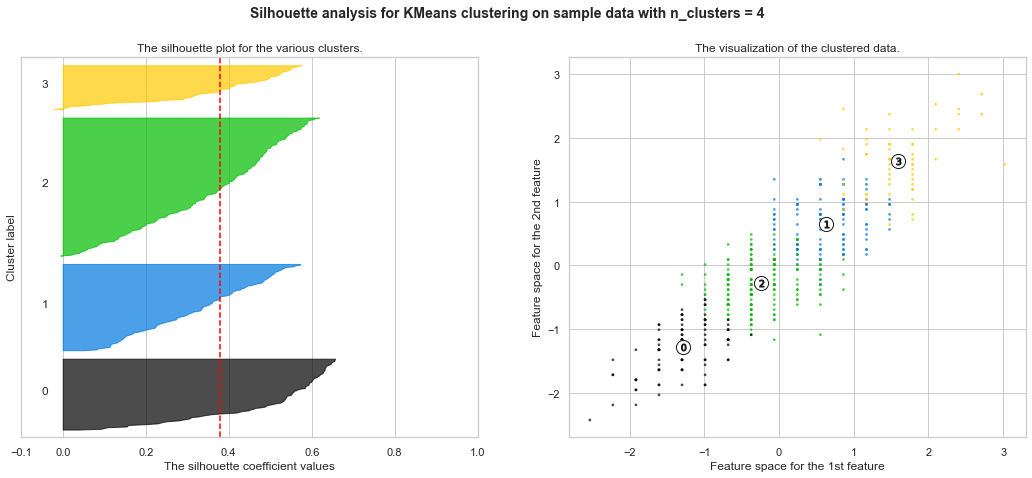

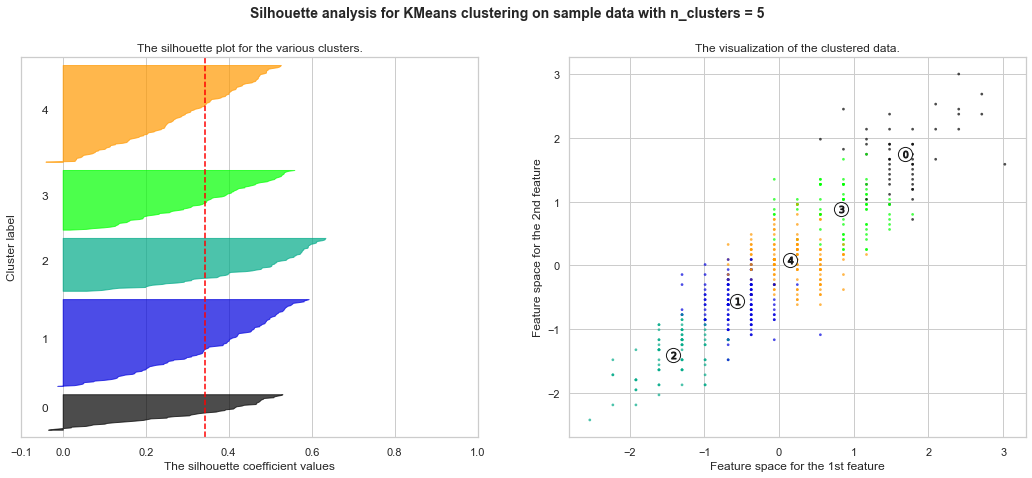

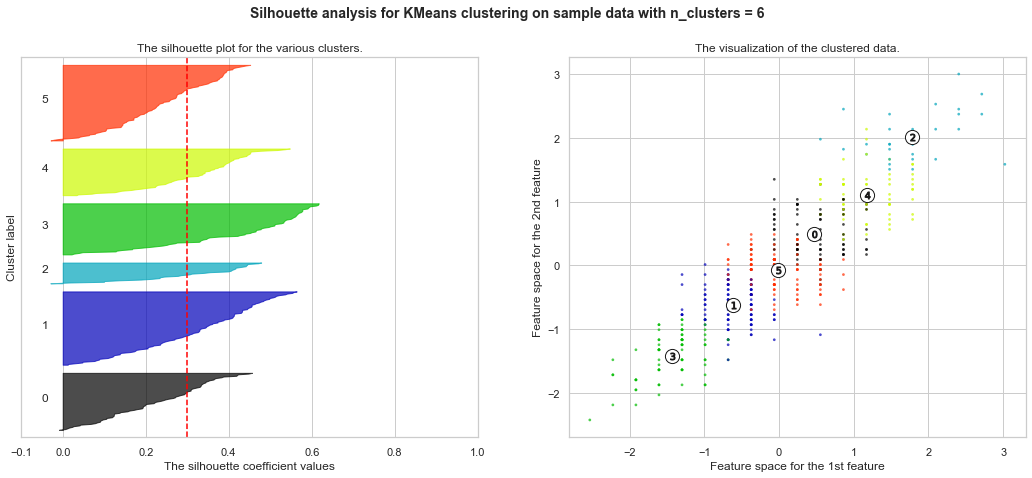

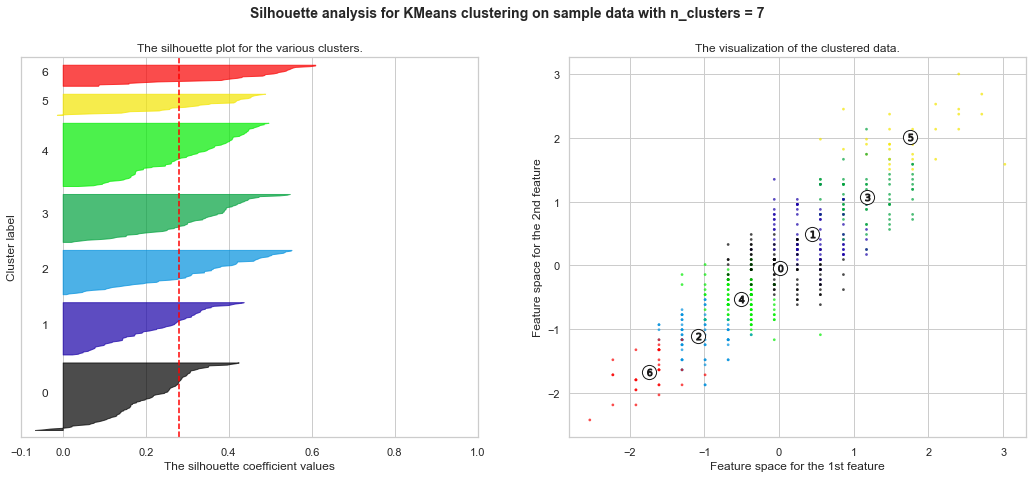

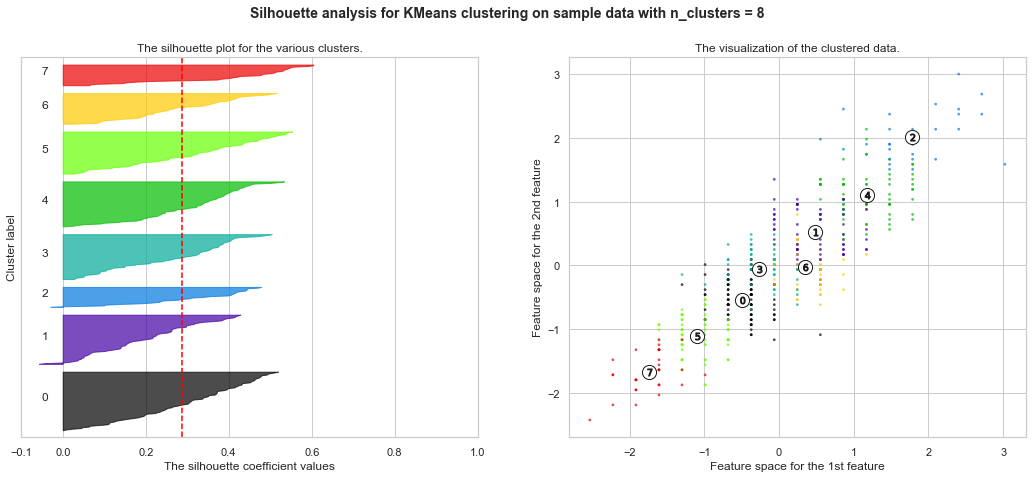

In [57]:
plot_silhouette(K, cluster_scaled)

From the calculation of Silhouette Score, we got the result : 
+ For n_clusters = 2 The average silhouette_score is : 0.4835182946272509
+ For n_clusters = 3 The average silhouette_score is : 0.4281636407220776
+ For n_clusters = 4 The average silhouette_score is : 0.3781275736270201
+ For n_clusters = 5 The average silhouette_score is : 0.3434371441372868
+ For n_clusters = 6 The average silhouette_score is : 0.3005529089363074
+ For n_clusters = 7 The average silhouette_score is : 0.27990365041484533
+ For n_clusters = 8 The average silhouette_score is : 0.28674847140946946

Based on these results, we can determine the optimal number of clusters using the silhouette score. It suggests that **n_cluster = 2** is the most suitable option, with the highest silhouette score of 0.483. However, if we aim for broader clusters, **n_cluster = 3** with a score of 0.428 is also a viable choice

----

# 8. Model Training

**Bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasi ada pada bagian Model Evaluation.**

In [58]:
kmean = KMeans(n_clusters=3)
kmean_clust = kmean.fit_transform(cluster_scaled)
labels = kmean.labels_

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [59]:
cluster_km = pd.DataFrame(kmean_clust)
cluster_km

,0,1,2
0,3.109972,4.987866,0.949510
1,1.372372,3.146660,1.299306
2,1.766206,3.636739,0.660474
3,0.733767,1.750177,2.609806
4,1.890058,0.397549,4.095529
...,...,...,...
439,0.979113,1.822728,2.722920
440,3.154493,5.038746,0.972569
441,3.462459,5.352564,1.249615
442,0.494309,2.194956,2.005347


In [60]:
cluster_res = pd.concat([cluster_df, pd.DataFrame({'cluster':labels})], axis=1)

In [61]:
cluster_res

,TransactionID,Qty,TotalAmount,cluster
0,17,60,623300,2
1,13,57,392300,2
2,15,56,446200,2
3,10,46,302500,0
4,7,27,268600,1
...,...,...,...,...
439,13,37,269400,0
440,18,62,577700,2
441,18,68,587200,2
442,11,42,423300,0


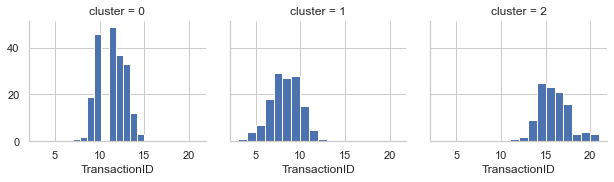

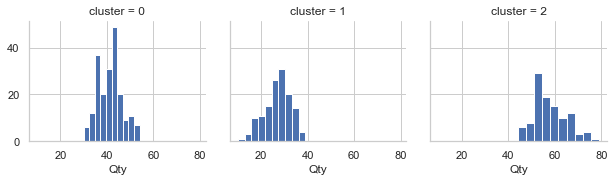

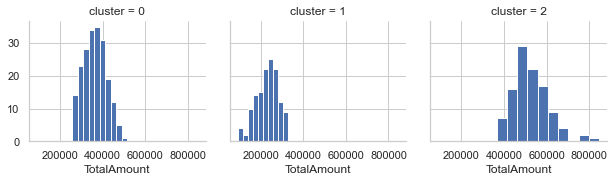

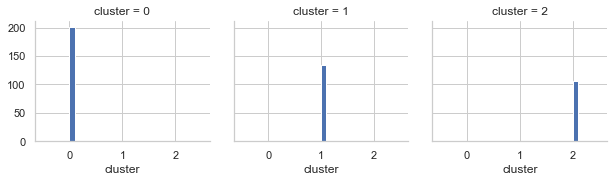

In [62]:
for c in cluster_res:
    grid = sns.FacetGrid(cluster_res, col='cluster')
    grid.map(plt.hist, c)
    grid.tight_layout(pad=2.0)

We will examine the variations between clusters for each significant feature.

**TransactionID** <br>
Kolom TransactionID (count) menunjukan seberapa sering berbelanja berdasarkan CustomerID. disini ditunjukan: <tr>

+ Cluster 0 represents customers with moderate shopping density, generally less than 15.
+ Cluster 1 comprises customers with a low shopping density, ranging between 5 and 10.
+ Cluster 2 includes customers with shopping density between 15 and 20.

**Qty** <br>

+ Cluster 0 embodies customers with a shopping quantity of 25 to 57 item.
+ Cluster 1 indicates customers with a shopping quantity in the range of 5 to 40 items.
+ Cluster 2 consists of customers who typically purchase more, ranging between 40 and 80 items.

**TotalAmount** <br>

+ Cluster 0 showcases customers with a total 200,000 and approximately 500,000.
+ Cluster 1 represents customers who spend less than 400,000.
+ Cluster 2 depicts customers who typically spend between 400,000 and occasionally more than 800,000.


Based on this cluster result we can conclude that

+ Cluster 0 **Regular Shoppers** 
Low Density, Quantity, and Total Shopping

+ Cluster 1 **Frugal Shoppers**
Moderate Density, Quantity, and Total Shopping

+ Cluster 2 **Frequent Spenders**
Varying Density, Quantity, and Total Shopping




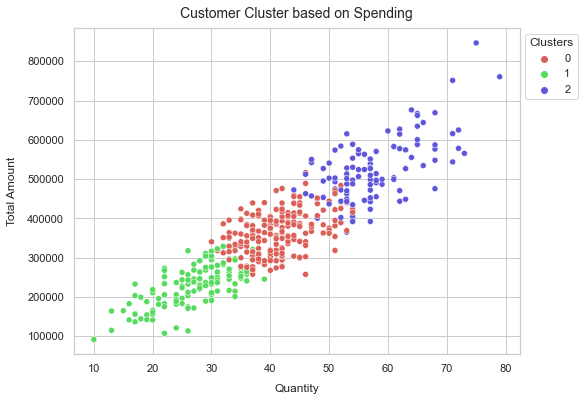

In [63]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cluster_res, x='Qty', y='TotalAmount', hue='cluster',
                palette=sns.color_palette('hls', 3))

plt.title('Customer Cluster based on Spending', fontsize=14, pad=10)
plt.xlabel('Quantity', fontsize=12, labelpad=10)
plt.ylabel('Total Amount', fontsize=12, labelpad=10)
plt.legend(title='Clusters', bbox_to_anchor=(1, 1), frameon=True)

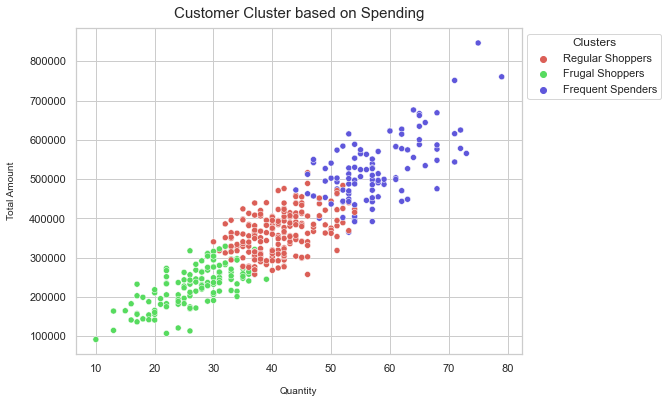

In [65]:
cluster_labels = {
    0: 'Regular Shoppers',
    1: 'Frugal Shoppers',
    2: 'Frequent Spenders'
}

plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(data=cluster_res, x='Qty', y='TotalAmount', hue='cluster',
                          palette=sns.color_palette('hls', 3))

plt.title('Customer Cluster based on Spending', fontsize=15, pad=10)
plt.xlabel('Quantity', fontsize=10, labelpad=13)
plt.ylabel('Total Amount', fontsize=10, labelpad=13)

handles, _ = scatter.get_legend_handles_labels()
plt.legend(handles, [cluster_labels[int(label)] for label in scatter.get_legend_handles_labels()[1]],
           title='Clusters', bbox_to_anchor=(1, 1), frameon=True)

plt.show()